<a href="https://colab.research.google.com/github/AmanDesai-coder/Presidential-Inaugural-Address-Analysis/blob/main/NLP_Practice_Inaugural_Addresses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
def sentiment_words(url):
    request = requests.get(url)
    print("retriving data >>> status code: ",request.status_code)
    text = request.text
    word_list = text[text.find("\n\n")+2:].split("\n")
    return word_list
pos_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
neg_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
pos_list = sentiment_words(pos_url)[:-1]
neg_list = sentiment_words(neg_url)[:-1]

retriving data >>> status code:  200
retriving data >>> status code:  200


In [2]:
print(pos_list)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [3]:
def is_pos(word):
 if (word in pos_list):
   return 1
 else: return 0

def is_neg(word):
 if (word in neg_list):
   return -1
 else: return 0 

def word_val_total(word):
  return is_pos(word) + is_neg(word)

def speech_positivity_calculator(speech):
  speech_words = speech.split(" ")
  sum  = 0
  for i in speech_words:
    sum = sum + word_val_total(i)
  return sum/len(speech_words)
    

is_pos("angry")

0

In [4]:
import nltk
from nltk.corpus import stopwords 
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
nltk.download('inaugural')
nltk.download('stopwords')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
names = inaugural.fileids()
content = [inaugural.raw(fileids=i) for i in names]
all_addresses_data = [speech_positivity_calculator(i) for i in content]
all_addresses_data

[0.029453015427769985,
 0.02962962962962963,
 0.03295750216825672,
 0.03710144927536232,
 0.019507663725034836,
 0.036720751494449186,
 0.009166666666666667,
 0.04712198031613481,
 0.025652565256525654,
 0.022664835164835164,
 0.045576407506702415,
 0.01452991452991453,
 0.012016718913270637,
 0.012613041408852927,
 0.022398995185262716,
 0.041666666666666664,
 0.030667468430547205,
 0.03206270039187745,
 0.00527338329170136,
 0.001440922190201729,
 0.03587443946188341,
 0.02339622641509434,
 0.0341047503045067,
 0.02346938775510204,
 0.03776978417266187,
 0.030323914541695383,
 0.019114688128772636,
 0.03867542972699697,
 0.027714675147660156,
 0.021406727828746176,
 0.028025241276911656,
 0.010065127294256957,
 0.02109426499670402,
 0.02032150439793752,
 0.031978185423896875,
 0.01619778346121057,
 0.010209564750134336,
 0.011797752808988765,
 0.013605442176870748,
 0.04129263913824058,
 0.03757356269805342,
 0.03231151615575808,
 0.013390139987827145,
 0.015395894428152493,
 0.01161

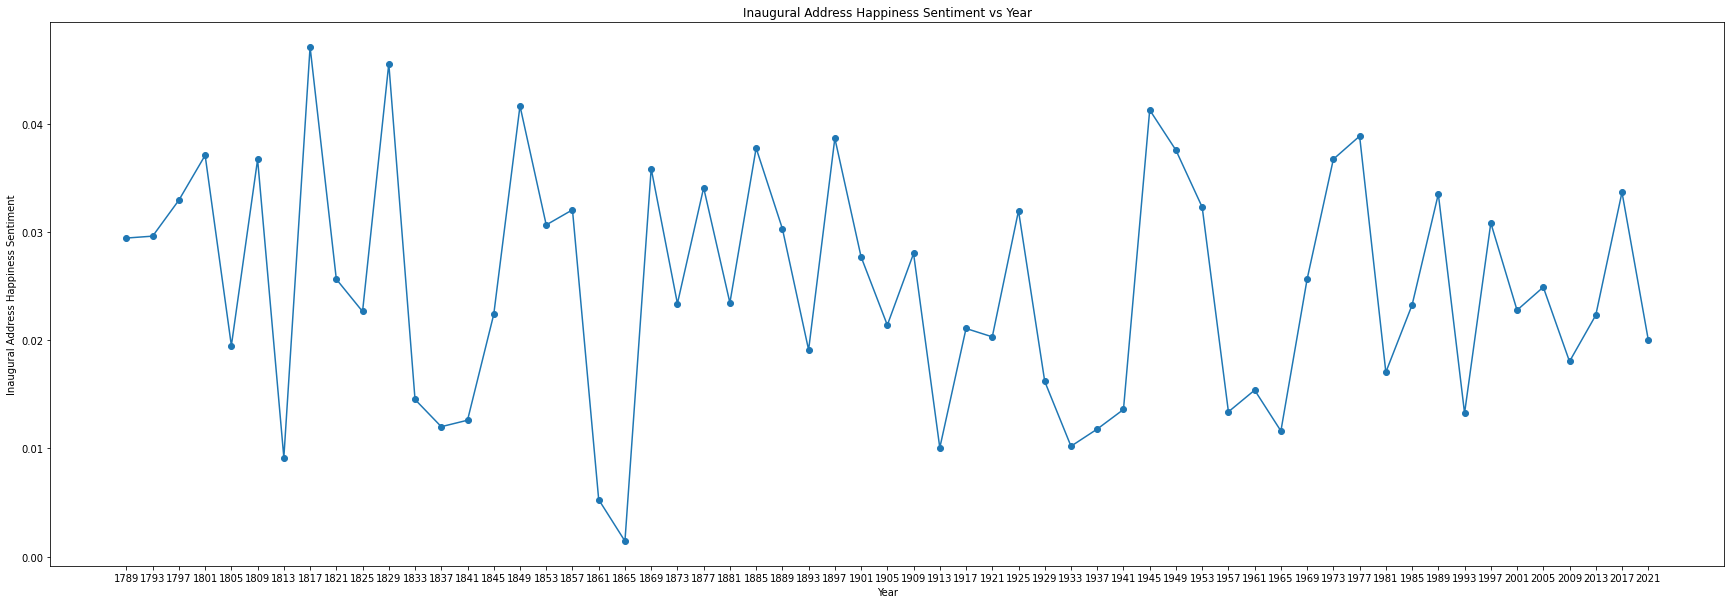

In [6]:
names = [i[:4] for i in names]
import matplotlib.ticker as mticker

plt.figure(figsize=(30,10))
#myLocator = mticker.MultipleLocator(6)
#fig, ax = plt.subplots()
#ax.xaxis.set_major_locator(myLocator)
plt.scatter(names, all_addresses_data)
plt.plot(names, all_addresses_data)
plt.title('Inaugural Address Happiness Sentiment vs Year')
plt.xlabel('Year')
plt.ylabel('Inaugural Address Happiness Sentiment')
plt.show()